In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import sys
import time
from datetime import datetime


df= pd.read_csv("log.csv")
#print(df.head())

df.head()

#end_time = df[df["status"]=="finished"]


,task_id,job_id,worker_id,status,time
0,0_M0,0,1,initiating,1.607587e+09
1,0_M0,0,1,finished,1.607587e+09
2,0_R0,0,2,initiating,1.607587e+09
3,0_R1,0,3,initiating,1.607587e+09
4,1_M0,1,1,initiating,1.607587e+09


In [2]:
a = df.task_id.unique()
b = df.job_id.unique()

In [3]:
t_list=[]
j_id=[]
w_id=[]
for i in a:
    temp = df[df["task_id"]==i].values
    t_list.append(temp[1][-1]-temp[0][-1])
    w_id.append(int(temp[0][-3]))
    j_id.append(int(temp[0][2]))
j_list=[]
for i in b:
    temp=df[df["job_id"]==i].values
    j_list.append(temp[1][-1]-temp[0][-1])


In [4]:
t_mean=np.array(t_list).mean()
print("mean time of task:",t_mean)
t_median=np.median(np.array(t_list))
print("median time of task:",t_median)
j_mean=np.array(j_list).mean()
print("mean time of job:",j_mean)
j_median=np.median(np.array(j_list))
print("median time of job:",j_median)

mean time of task: 2.5133845680638363
median time of task: 2.0720608234405518
mean time of job: 1.2129449844360352
median time of job: 0.00044226646423339844


<AxesSubplot:>

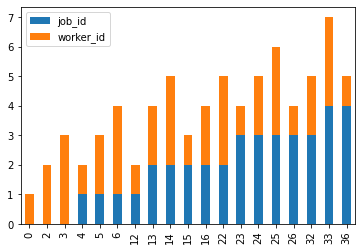

In [6]:
df1 = df[df["status"]=="initiating"]
df1=df1.drop(columns=['time'])
df1.plot.bar(stacked=True)


    
#random

#df['time'] = pd.to_datetime(df['time'])
#df.plot.bar(x="task_id",y="time")
